# Implementation and Evaluation of a case study using Machine Learning techniques

Harvey Allen (1926159)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

insuranceDF = pd.read_csv('CW1_data_202223.csv') #Import Data

insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB


## Data Exploration 

In [2]:
insuranceDF.head()

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0


In [3]:
insuranceDF.describe() #Identifies catagoric coulumns with containing numeric values

,id,Age,HasDrivingLicense,RegionID,Switch,SalesChannelID,DaysSinceCreated,Result
count,304887.000000,274339.000000,274399.000000,274334.000000,152557.000000,304887.000000,304887.000000,304887.000000
mean,190594.098072,38.832561,0.997853,26.408892,0.458281,111.966591,154.272609,0.121970
std,110022.144283,15.504062,0.046281,13.213345,0.498258,54.230069,83.642389,0.327251
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,95342.500000,25.000000,1.000000,15.000000,0.000000,26.000000,82.000000,0.000000
50%,190639.000000,36.000000,1.000000,28.000000,0.000000,131.000000,154.000000,0.000000
75%,285785.500000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,1.000000


In [4]:
#Data Reduction 

insuranceDF.drop(['id'], axis=1, inplace = True)


The ID column is a redundant data feature as it provides no value to a classification model, thus is removed.

In [5]:
#Splitting the dataset into numerical and catagorical feature subsets

categoricalFeatures = ['Gender', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge', 'PastAccident', 'SalesChannelID']
numericalFeatures = ['Age', 'AnnualPremium', 'DaysSinceCreated']


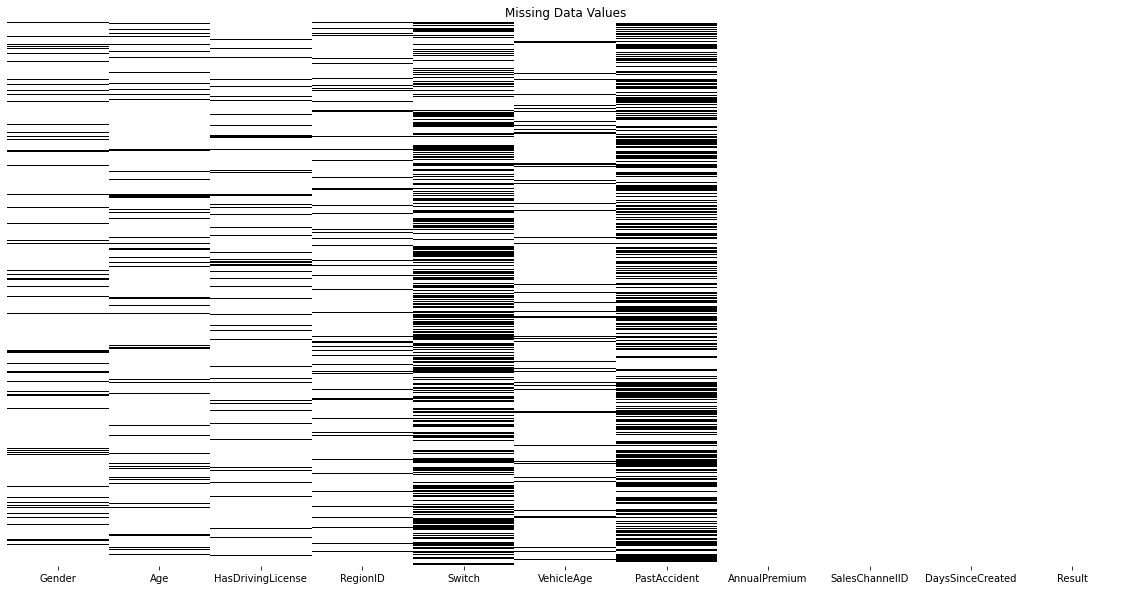

In [6]:
#Data Exploration - Missing Data

plt.figure(figsize=(20,10))
sns.heatmap(insuranceDF.isnull(), yticklabels=False, cbar=False, cmap='gray_r')
plt.title('Missing Data Values')
plt.show()


It can be observed that all data values within the file provided are ‘missing at random’, therefore both inspection and elimination methods are valid options for each feature.

In [7]:
#Data Value Manipulation

insuranceDF['AnnualPremium'] = insuranceDF['AnnualPremium'].str.replace(',', '')
insuranceDF['AnnualPremium'] = insuranceDF['AnnualPremium'].str.replace('£', '')


In [8]:
#Alligning feature data types

#Catagorical -> Numerical
insuranceDF['AnnualPremium'] = insuranceDF['AnnualPremium'].astype(float) 

#Numerical -> Catagorical
insuranceDF['Switch'] = insuranceDF['Switch'].astype(str)
insuranceDF['HasDrivingLicense'] = insuranceDF['HasDrivingLicense'].astype(str)
insuranceDF['SalesChannelID'] = insuranceDF['SalesChannelID'].astype(str)
insuranceDF['RegionID'] = insuranceDF['SalesChannelID'].astype(str)
insuranceDF['Result'] = insuranceDF['Result'].astype(str)


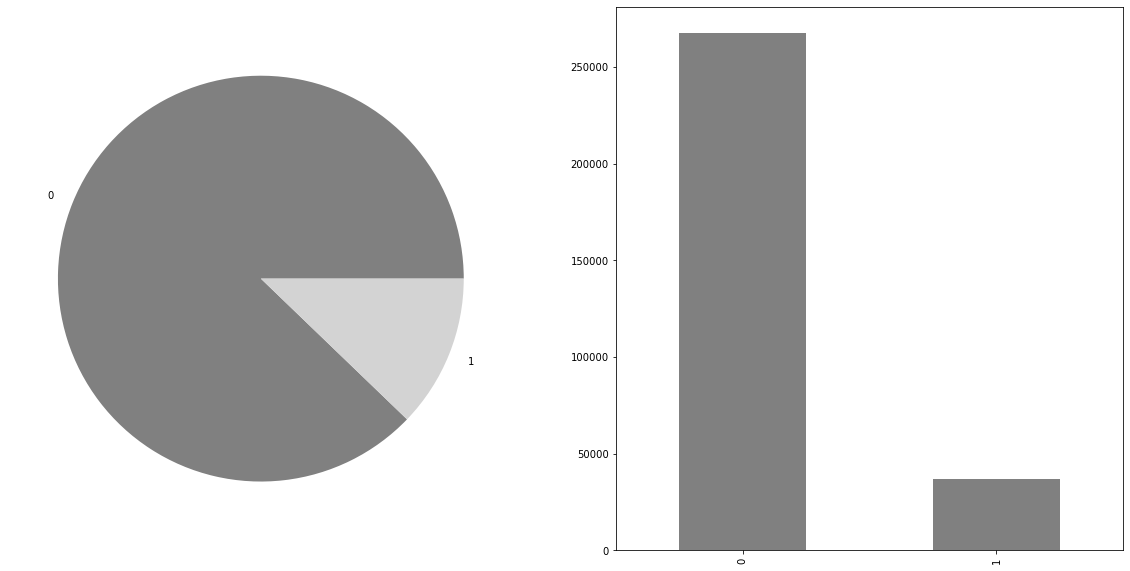

In [9]:
#Data Exploration - Target Analysis

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].pie(insuranceDF['Result'].value_counts(), labels=['0', '1'], colors=['grey', 'lightgrey'])
insuranceDF['Result'].value_counts().plot(kind='bar', color='grey', axes=ax[1])
plt.show()


Clear data class imbalance within the target feature.

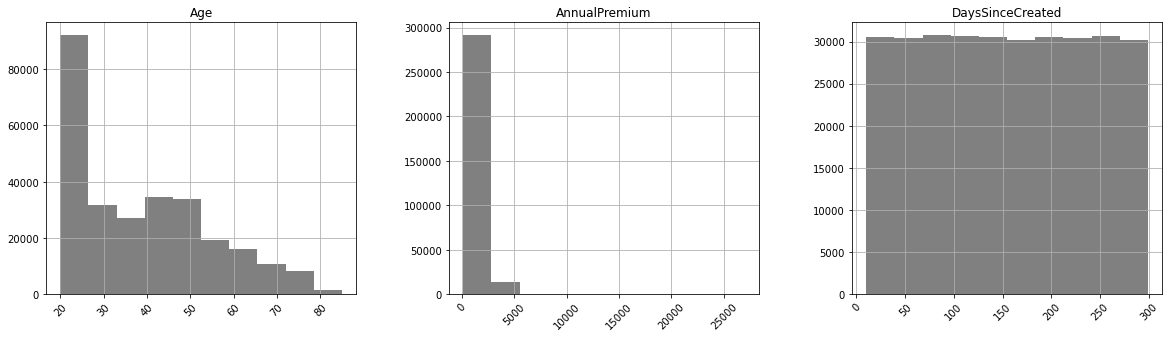

In [10]:
#Data Exploration- Histogram (Numerical Features) Distribution Analysis

insuranceDF.hist(column=numericalFeatures, figsize=(20,5), layout=(1, 3), xrot=45, color='grey')
plt.show()


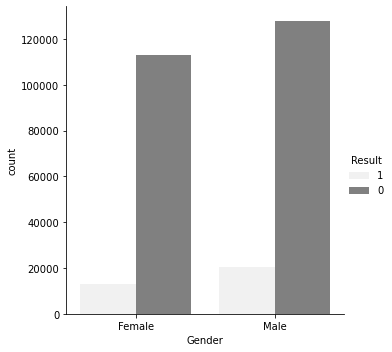

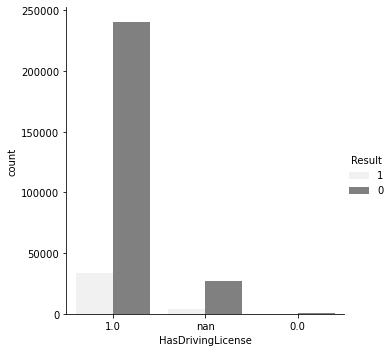

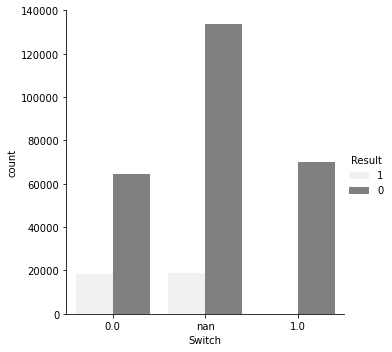

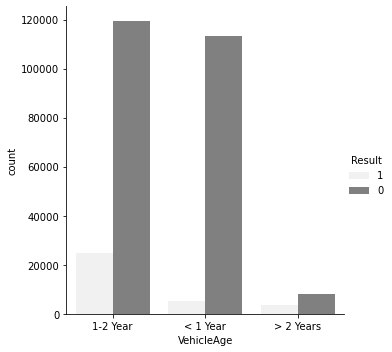

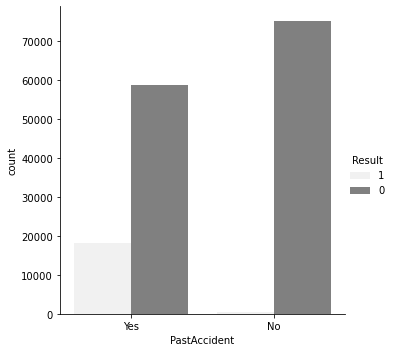

In [11]:
#Data Exploration - Stacked Bar Chart (Categorical Features)

standardCategoricalFeatures = ['Gender', 'HasDrivingLicense', 'Switch', 'VehicleAge', 'PastAccident']

for feature in standardCategoricalFeatures:
    sns.catplot(x=feature, kind='count', hue='Result', data=insuranceDF, sharey=False, color='grey')
        

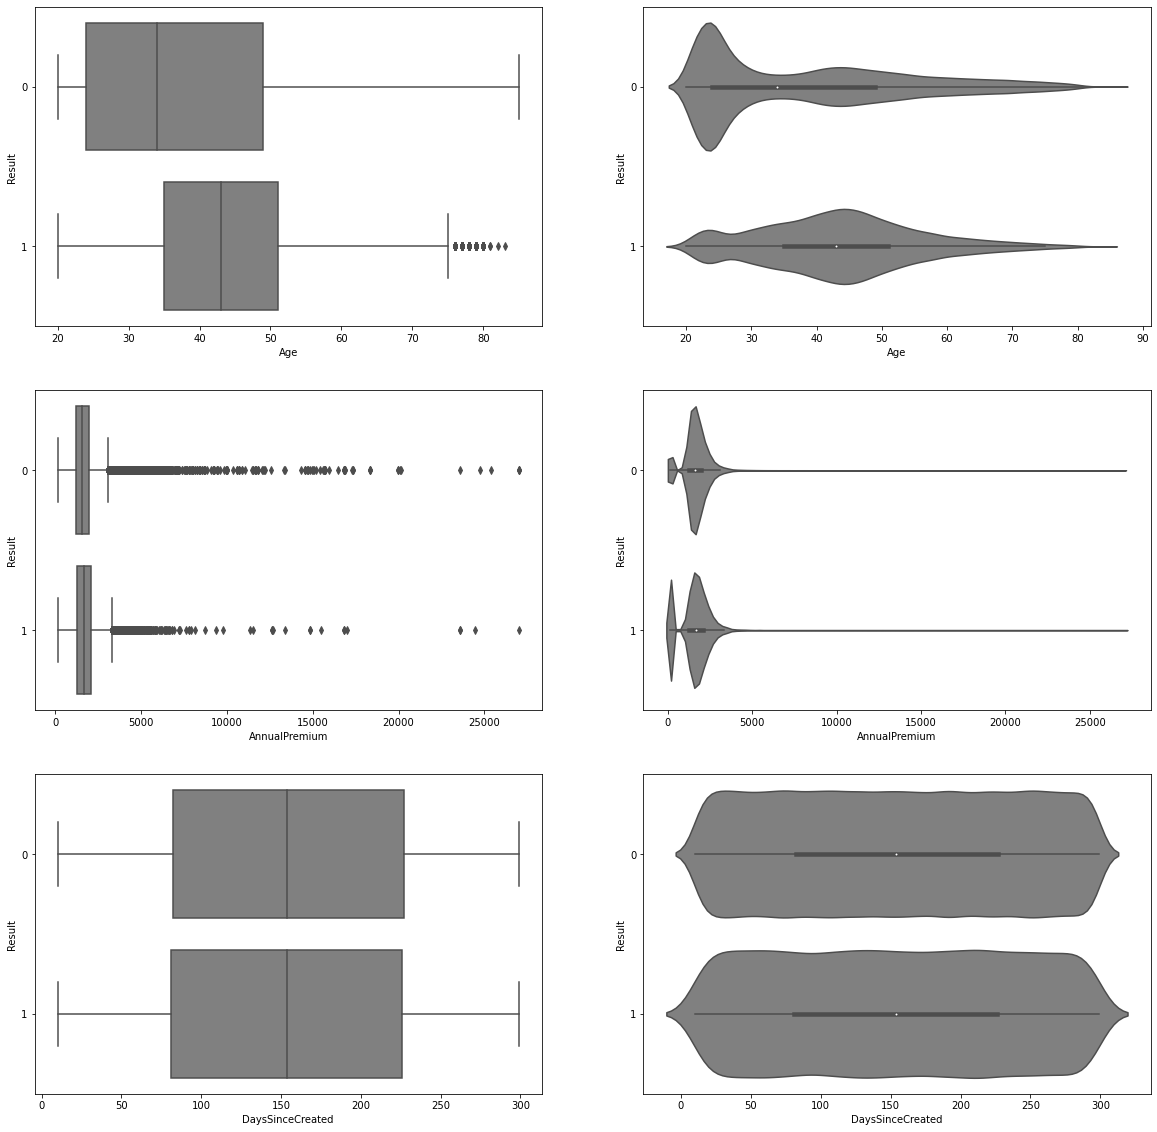

In [12]:
#Data Exploration - Univirate Analysis (Box Plot and Violin Plot)

fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for col in range(0, len(numericalFeatures)):
    sns.violinplot(ax=axes[col, 1], y=insuranceDF['Result'].astype('category'), x=numericalFeatures[col], data=insuranceDF, color='grey')
    sns.boxplot(ax=axes[col, 0], y=insuranceDF['Result'].astype('category'), x=numericalFeatures[col], data=insuranceDF, color='grey')
plt.show()
    

Various outliers are clearly present throughout each numerical feature. A suitable scaling method will need to be adopted to resolve this.

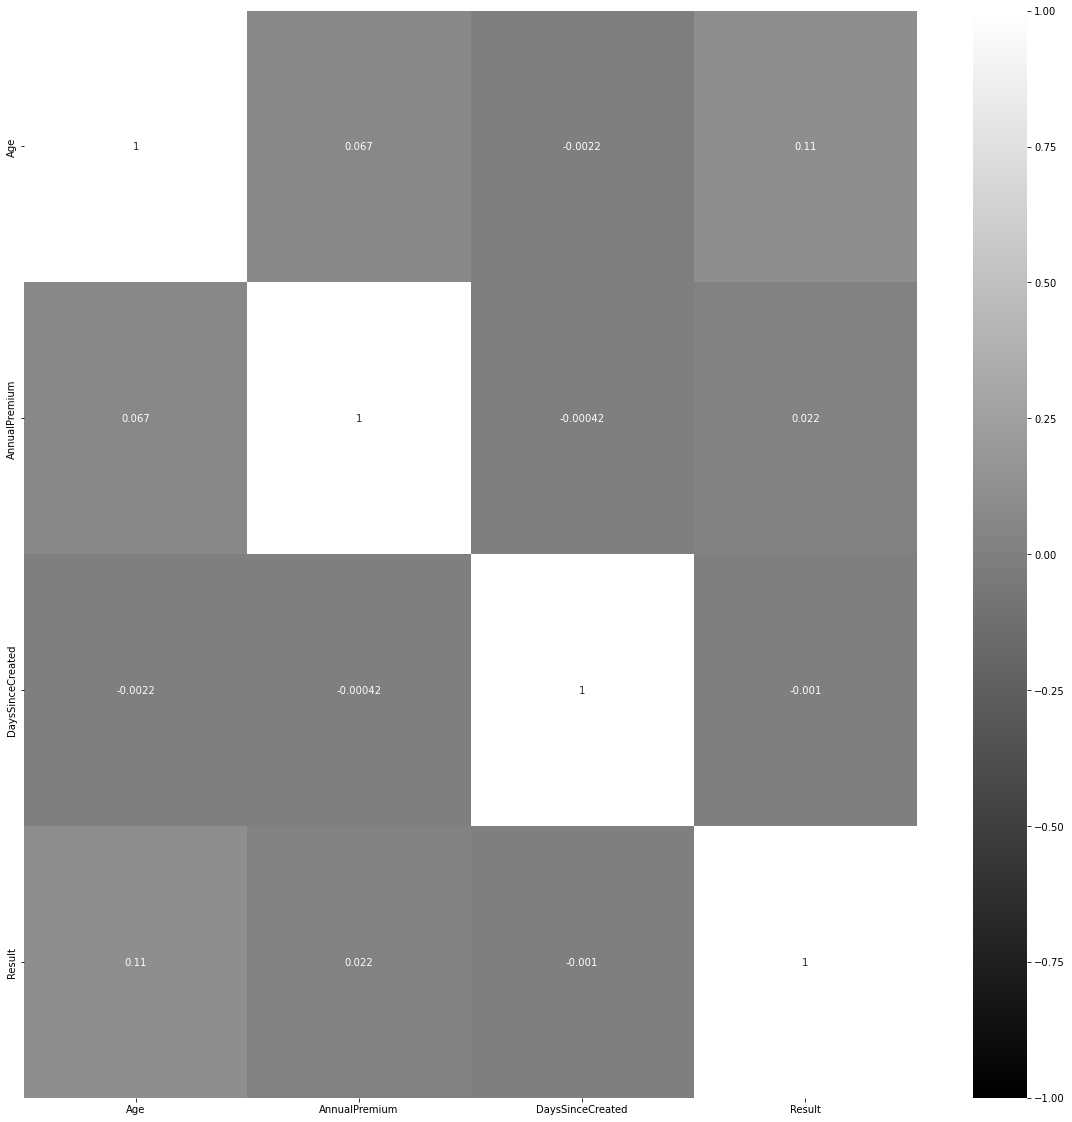

In [13]:
#Data Exploration - Multivaritive Correlation Matrix

insuranceDF['Result'] = insuranceDF['Result'].astype(float)

plt.figure(figsize=(20,20))
correlation = insuranceDF.corr()
sns.heatmap(correlation, cmap='gray', annot=True, vmax=1, vmin=-1)
plt.show()


The target variable has a clear positive correlation relationship with the Age variable (0.11).

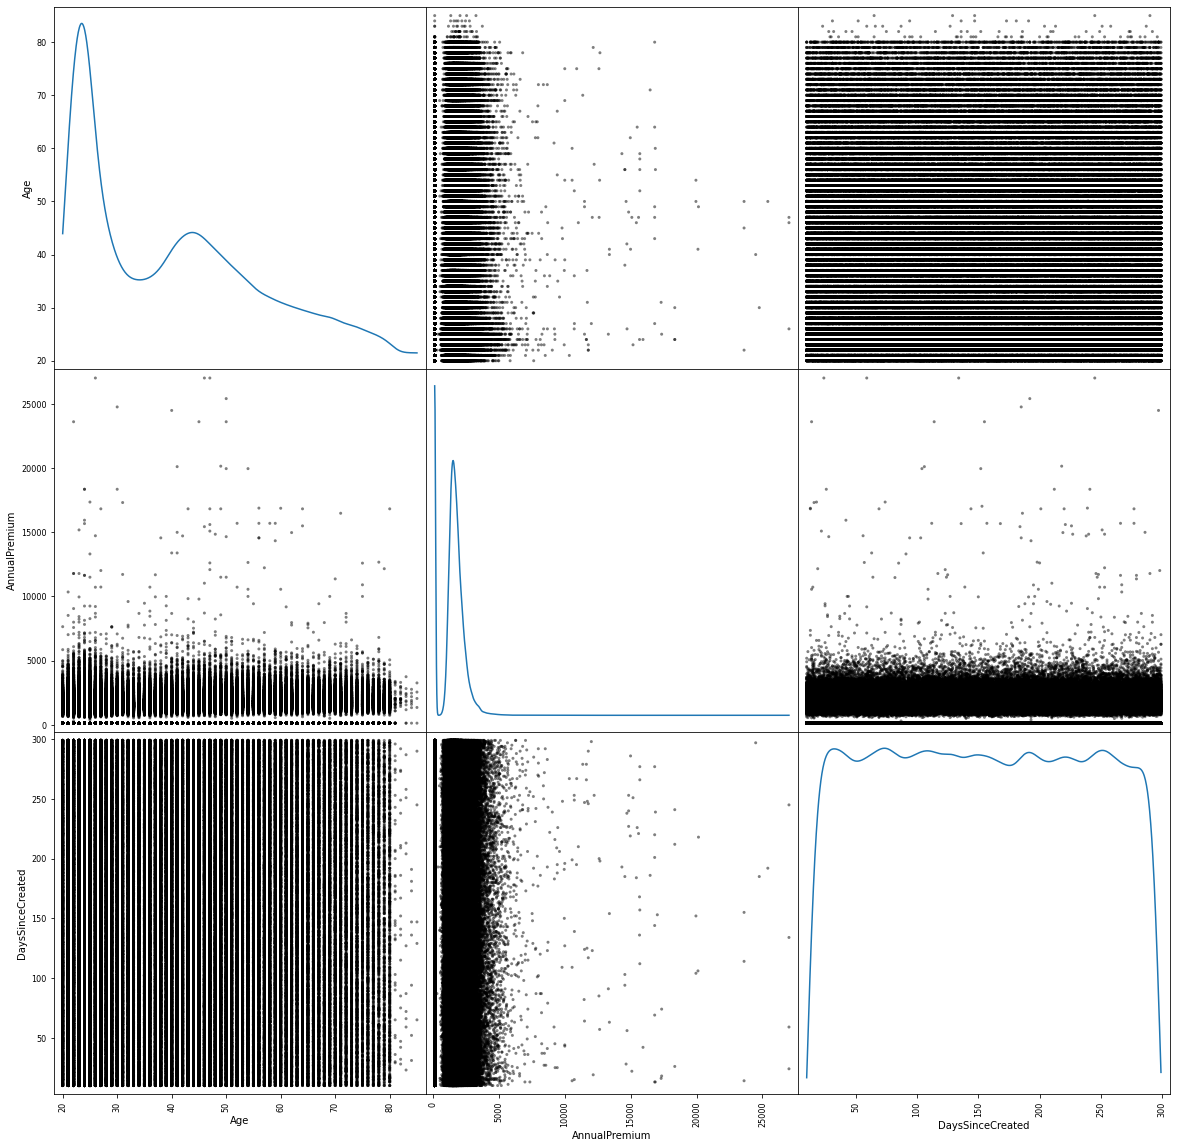

In [14]:
#Data Exploration - Scatter Plot Matrix

insuranceDF['Result'] = insuranceDF['Result'].astype(float)
pd.plotting.scatter_matrix(insuranceDF[numericalFeatures], c='black', figsize=(20,20), diagonal='kde')
insuranceDF['Result'] = insuranceDF['Result'].astype(str)
plt.show()


The KDE graphs demonstrate a general normal distribution. A suitable scaling method will need to be adopted to resolve this.

## Data Pre-Processing 

In [15]:
#Data Reduction

insuranceDF.drop(['SalesChannelID'], axis=1)
categoricalFeatures.remove("SalesChannelID")


In [16]:
#Missing Values

print("Missing Values Before: ")
print(insuranceDF.isnull().sum())

#Past Accident - Feature Removal
categoricalFeatures.remove("PastAccident")
insuranceDF = insuranceDF.drop("PastAccident", axis=1)
#Switch - Feature Removal
categoricalFeatures.remove("Switch")
insuranceDF = insuranceDF.drop("Switch", axis=1)
#Multiple missing values - Attribute Removal
insuranceDF = insuranceDF[insuranceDF.isnull().sum(axis=1) < 1]

print("Missing Values After: ")
print(insuranceDF.isnull().sum())

insuranceDF.head()

Missing Values Before: 
Gender                30427
Age                   30548
HasDrivingLicense         0
RegionID                  0
Switch                    0
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64
Missing Values After: 
Gender               0
Age                  0
HasDrivingLicense    0
RegionID             0
VehicleAge           0
AnnualPremium        0
SalesChannelID       0
DaysSinceCreated     0
Result               0
dtype: int64


,Gender,Age,HasDrivingLicense,RegionID,VehicleAge,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,Female,39.0,1.0,55,1-2 Year,2645.3,55,227,1.0
1,Male,38.0,1.0,26,1-2 Year,1151.9,26,29,0.0
2,Male,22.0,1.0,152,< 1 Year,2265.9,152,166,0.0
3,Female,23.0,1.0,151,< 1 Year,1456.6,151,277,0.0
4,Male,56.0,1.0,154,> 2 Years,131.5,154,155,0.0


Missing Value Removal:

Feature Removal: Switch and PastAccident are completely removed from the data set due to their high quantity of missing values and weak relationship with the target variable.

Attribute Removal: Attributes with more than one missing value are removed from the data set as they cannot be imputed to a level of accuracy that would preserve their overall quality. 

In [17]:
#Testing and Training Data

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

insuranceX = insuranceDF[categoricalFeatures + numericalFeatures]
insuranceY = insuranceDF[['Result']]

#Balance target feature
sampling = RandomUnderSampler()
x_trainBalanced, y_trainBalanced = sampling.fit_resample(insuranceX, insuranceY)

#Test-Train split
x_train, x_test, y_train, y_test = train_test_split(x_trainBalanced, y_trainBalanced, test_size=0.3, random_state=0, stratify=y_trainBalanced) 


A Test-Train split of 3:7 is used to provide accurate results, with a random under sampled target class balanced strategy to fix the imbalance found in the target class. 

In [18]:
#Pre-processing Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer

#Implementing transformation methods
categorical_transformer = Pipeline([('imputer_cat', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
numeric_transformer = Pipeline([('imputer_cat', SimpleImputer(strategy='mean')), ('imputer_num', KNNImputer(n_neighbors=2)), ('robust', RobustScaler()), ('standard', StandardScaler())])
preprocessor = ColumnTransformer([('categoricals', categorical_transformer, categoricalFeatures), ('numericals', numeric_transformer, numericalFeatures)], remainder = 'drop')

#Running features through the pre-processing pipeline
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


Pre-processing Pipeline:

Numerical Mean and Mode Value Imputation: A univariate mean imputation method is used for numerical data, and mode for categorical data, as the distribution analysis (Histogram and KDE Graphs) supports this methodology. 

KNN Categorical Value Imputation: A multivariate imputation approach using the mean value found through the K-Nearest Neighbours algorithm to fill missing categorical data values. 

Robust Scaling and Standard Scaling methods are implemented in sequence when pre-processing numerical data. A Robust Scaling method is initially performed to remove the outliers exposed within the data (Box Plotting) then a Standard Scalar is implemented to map to a standard normal distribution, viewed as suitable for the data through distribution analysis (Histogram and KDE Graphs).

The One-Hot Encoding method is implemented when pre-processing categorical data as the categorical data provided in nominal. This encoding method involves creating new columns for each possible value in the categorical data and assigning a 1 to the column corresponding to the actual value and 0s to the other columns.


## Model Implementation 

In [ ]:
#Hyper Parameter Optimisation 

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Outlining models and their equivilant parameter search areas
SVMmodel = svm.LinearSVC()
SVMparameters = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
LRmodel = LogisticRegression(max_iter=5000) #Allow Convergence
LRparameters = {'penalty':['l1', 'l2'], 'C':np.logspace(-5, 5, 20)}
DTmodel = DecisionTreeClassifier()
DTparameters = {'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12]}

modelParameters = {SVMmodel:SVMparameters, LRmodel:LRparameters, DTmodel:DTparameters}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1) #K-Fold cross validation method

#Optimal parameter search for each model
for model, parameters in modelParameters.items():
    search = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=cv)
    result = search.fit(x_train, np.ravel(y_train))
    print('Optimal Hyperparameters: %s' % result.best_params_)


To acquire the optimal parameters, an exhaustive grid search is performed for a set parameter space using the model and cross validation to return performance scores, the parameter combination that returns the leading results is deemed optimal for that search space. All models evaluated will be fully optimised for this classification problem. However, not all parameters could be accounted for due to processing time.

Cross Validation is utilised to test the ability of a machine learning model to predict new data.

In [19]:
#Model Evaluation

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def modelMetrics(modelName, actual, predicted):
    print(modelName + " Classification Scores:")
    print("Accuracy: ", round(accuracy_score(actual, predicted), 3))
    print("Precision: ", round(precision_score(actual, predicted, pos_label="1.0"), 3))
    print("Recall: ", round(recall_score(actual, predicted, pos_label="1.0"), 3))
    print("F1 Score: ", round(f1_score(actual, predicted, pos_label="1.0"), 3))
    print(" ")


These metrics have been selected as a basis to evaluate performance as they are considered common practice for a classification problem. Accuracy is the core evaluation metric as it should give reliable performance indication.

In [20]:
#K-Fold Cross Validation Training Test

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=4, shuffle=True) #K-Fold cross validation method


In [21]:
from sklearn import svm

#Support Vector Machine Model Testing
SVMmodel = svm.LinearSVC(C=1, penalty='l2')
SVMmodel.fit(x_train, y_train)
y_predicted = SVMmodel.predict(x_test)
modelMetrics("Support Vector Machine", y_test, y_predicted)
scores = cross_val_score(SVMmodel, x_train, y_train, scoring='accuracy', cv=cv)
print('Cross Validation Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Support Vector Machine Classification Scores:
Accuracy:  0.706
Precision:  0.66
Recall:  0.848
F1 Score:  0.742
 
Cross Validation Accuracy: 0.705 (0.003)


In [22]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Model Testing 
LRmodel = LogisticRegression(C=0.033598, penalty='l2')
LRmodel.fit(x_train, y_train)
y_predicted = LRmodel.predict(x_test)
modelMetrics("Logistic Regression", y_test, y_predicted)
scores = cross_val_score(LRmodel, x_train, y_train, scoring='accuracy', cv=cv)
print('Cross Validation Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Logistic Regression Classification Scores:
Accuracy:  0.704
Precision:  0.659
Recall:  0.848
F1 Score:  0.741
 
Cross Validation Accuracy: 0.706 (0.005)


In [23]:
from sklearn.tree import DecisionTreeClassifier

#Decsion Tree Model Testing
DTmodel = DecisionTreeClassifier(criterion='gini', max_depth=4)
DTmodel.fit(x_train, y_train)
y_predicted = DTmodel.predict(x_test)
modelMetrics("Decision Tree", y_test, y_predicted)
scores = cross_val_score(DTmodel, x_train, y_train, scoring='accuracy', cv=cv)
print('Cross Validation Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Decision Tree Classification Scores:
Accuracy:  0.701
Precision:  0.66
Recall:  0.827
F1 Score:  0.734
 
Cross Validation Accuracy: 0.703 (0.004)


A Support Vector Machine is selected as the optimal model for this classification problem. It was selected as it demonstrated superior performance metrics and had most range for further optimisation.

In [24]:
#Pipeline Implementation 

from sklearn.pipeline import make_pipeline

clf = svm.LinearSVC(C=1, penalty='l2')
SVMpipeline = make_pipeline(clf) #Final pipeline

SVMpipeline.fit(x_train, y_train)
y_predicted = SVMmodel.predict(x_test)
modelMetrics("Support Vector Machine", y_test, y_predicted)


Support Vector Machine Classification Scores:
Accuracy:  0.706
Precision:  0.66
Recall:  0.848
F1 Score:  0.742
 


## Performance Evaluation

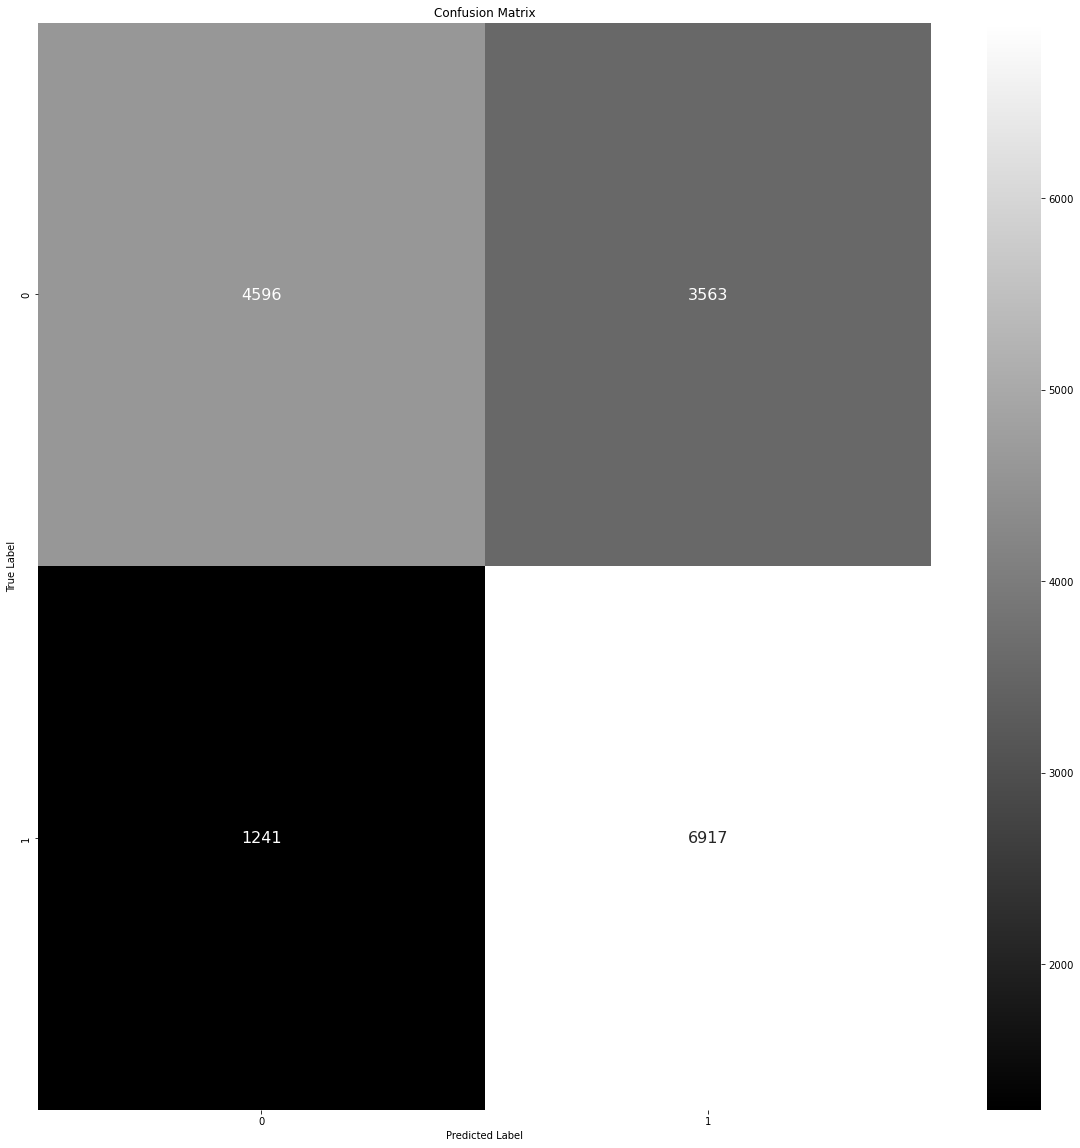

In [25]:
#Performance Evaluation - Confusion Matrix 

from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(20, 20)) 

confusionMatrix = pd.DataFrame(confusion_matrix(y_test, y_predicted))   
sns.heatmap(confusionMatrix, annot=True, annot_kws={"size": 16}, fmt="g", cmap='gray')  
plt.title("Confusion Matrix")  
plt.xlabel("Predicted Label")  
plt.ylabel("True Label")  
plt.show()  


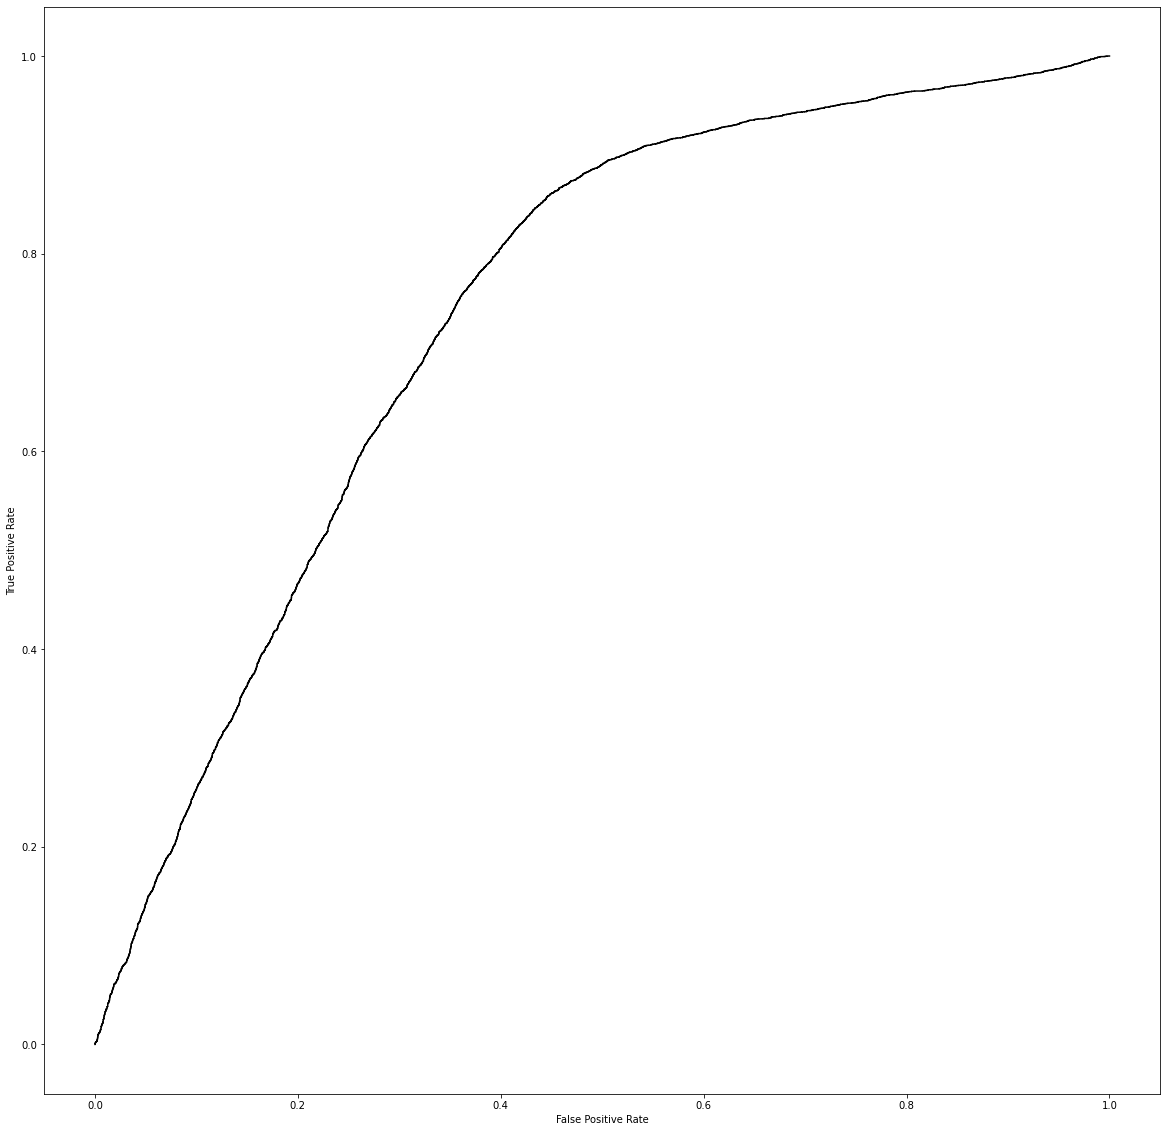

AUC=0.74


In [26]:
#Performance Evaluation - Reciever Operating Characteristic Curve

from sklearn.metrics import roc_curve, roc_auc_score  

from sklearn.calibration import CalibratedClassifierCV 

fig = plt.figure(figsize=(20, 20)) 

#Implementing secondary classifier for probability prediction compatability
clf = CalibratedClassifierCV(clf)
clf.fit(x_train, y_train)
y_probability = clf.predict_proba(x_test)[::,1]

fpr, tpr, _ = roc_curve(y_test, np.ravel(y_probability), pos_label="1.0") #False and True positive rates
auc = roc_auc_score(y_test, y_probability) #Calculate AUC score

plt.plot(fpr, tpr, color='black')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC="+str(round(auc, 2)))


The classifier is clearly effective however it could have a significantly improved performance.

In [27]:
#Performance Evaluation - Logarithmic Loss

from sklearn.metrics import log_loss

print("Logarithmic Loss: ", round(log_loss(y_test, np.ravel(y_probability)), 2))


Logarithmic Loss:  0.59


Mediocre performance for binary classification.

Overall, the SVM demonstrated strong performance in this evaluation. However, there are opportunities for further improvement. Specifically, the recall-precision balance. It would be valuable to explore methods for increasing precision for the positive class, such as adjusting the classification threshold or using a different evaluation metric that places greater emphasis on precision. Additionally, it may be worthwhile to consider alternative kernel functions or regularization values, not included within the current hyperparameter optimisation, to see their effect on classifier performance. Further, incorporating additional features or applying feature selection techniques could potentially enhance the classifier's ability to learn from the data.